<a href="https://colab.research.google.com/github/sonalisanjeevprabu18/Neural-Network-and-Deep-Learning/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2324 - loss: 1.5192
Epoch 2/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1961 - loss: 1.4515
Epoch 3/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.2156 - loss: 1.4033
Epoch 4/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.2993 - loss: 1.3930
Epoch 5/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.2965 - loss: 1.3798
Epoch 6/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2692 - loss: 1.3731
Epoch 7/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3501 - loss: 1.3759
Epoch 8/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3447 - loss: 1.3642
Epoch 9/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4623 - loss: 1.3465
Epoch 10/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4065 - loss: 1.3396
Epoch 11/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3700 - loss: 1.3389
Epoch 12/12
10/10 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


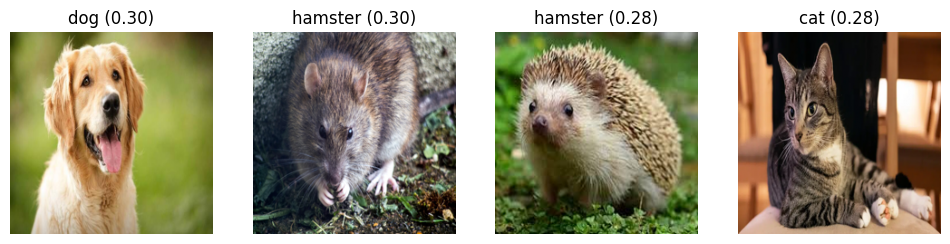

In [11]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# ---- Paths and Labels ----
paths = ["/content/1.jpg", "/content/2.jpg", "/content/3.jpg", "/content/4.webp"]
labels = ["dog", "hamster", "hedgehog", "cat"]
class_names = labels

IMG_SIZE = (224,224)

# ---- Load originals ----
def load_img(p):
    return np.array(Image.open(p).convert("RGB").resize(IMG_SIZE))/255.0

orig = np.stack([load_img(p) for p in paths])
y = np.arange(4)   # numeric labels: 0,1,2,3

# ---- Augment originals for training ----
aug = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

X = []
Y = []
for i in range(4):
    base = orig[i:i+1]
    for _ in range(80):          # 80 augmentations per image
        X.append(aug(base)[0])
        Y.append(i)

X = np.array(X)
Y = np.array(Y)

# ---- Build small model ----
base = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet',
                                         input_shape=IMG_SIZE+(3,))
base.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE+(3,))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# ---- Train ----
model.fit(X, Y, epochs=12, verbose=1)

# ---- Predict ----
pred = model.predict(orig)
pred_idx = np.argmax(pred, axis=1)

# ---- Display ----
plt.figure(figsize=(12,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(orig[i])
    plt.title(f"{class_names[pred_idx[i]]} ({pred[i][pred_idx[i]]:.2f})")
    plt.axis("off")
plt.show()
